# Identifying High-Engagement Player Segments Through Demographic and Behavioral Analysis

**Authors:**  
- Kehan Hettiarachchi  
- Kenshin Tanaka  
- Caio Matos  
- Finley Bradshaw  

**Date:** April 5, 2025

## Introduction

Understanding which players contribute the most in-game data is essential for making informed decisions in game design, user retention, and personalized content strategies. This project aims to identify player characteristics that are strongly linked to high engagement, which we measure by total hours played. Engagement is a key performance indicator in gaming; players who spend more time in-game generally provide more interaction data, are more likely to convert to paid services, and can serve as valuable participants in beta testing or early feature releases.

The central question guiding this report is:  
**Can we use player attributes such as age, experience level and subscription status to predict how many hours a player will play?**

We will explore this by utilizing a dataset called `players.csv`, which contains **196 player records** and **seven variables**: `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `age`. This dataset seems to be collected from an online platform and includes both **numeric variables** (such as `played_hours` and `age`) and **categorical fields** (such as `experience`, `subscribe`, and `gender`) that provide insights into player demographics and behavior.


### Dataset Overview

- **Played hours** is the main target variable, ranging from 0 to 223.1 hours. It has a mean of **5.85** and a median of **0**, which indicates a highly skewed distribution with outliers.

- **Participant ages** range from **8 to 50 years**, with a mean of approximately **20.5** and a median of **19**. Two entries are missing from the dataset.

- **Experience** is divided into five levels:
  - Amateur (32%)
  - Beginner (3%)
  - Pro (7%)
  - Regular (22%)
  - Veteran (36%)

- **Subscribe** is mostly `TRUE` (~73%), indicating a high subscription rate.

- **Gender demographics** include:
  - Male (63%)
  - Female (19%)
  - Non-binary (12%)
  - A few minor categories grouped under `"Other"`
  - Not included in the analysis as gender is too subjectif these days and there are too many different genders to account for in the data set.

- `hashedEmail` and `name` serve as **unique identifiers** and are not utilized in the analysis.

### Rationale

Identifying high-engagement players offers both analytical and business value. From an analytical perspective, understanding how various factors relate to playtime can help optimize predictive models. For business or design teams, knowing who the most active players are can support targeted marketing campaigns, loyalty programs, and content customization.

However, there are potential modeling challenges to consider:
- **Outliers** in `played_hours`, where many players have recorded 0 hours while a small number play extensively.
- **Low-frequency categories** in `experience` and `subscription`, which can compromise the reliability of results for smaller groups.

This project utilizes **Jupyter Notebook** to execute the complete analysis pipeline: loading and cleaning data, performing exploratory data analysis (EDA), and applying regression techniques to model playtime based on demographic attributes. Every aspect of this process is designed to be fully reproducible and understandable for both technical and non-technical audiences.

By the end of this report, we aim to provide actionable insights and a functioning model that highlights the characteristics of the players who are most engaged with the game. These insights can inform recruiting strategies for data collection, enhance retention efforts, and aid in game personalization initiatives.


To use the attributes of experience, being subscribed to a related gaming news letter and age to try and predict hours played, we will be using a k-nn regression model. As the attributes do not have an identified linear relationship with hours played, we will be using a k-nn regression model as this model does not need any specific relationship between the data. To be able to use the k-nn regression model, the values in the experience column and the subscribe column were altered. The experience column values have been changed to the according: 
Beginner = 1 
Amateur = 2 
Regular = 3 
Pro = 4 
Veteran = 5 
The subscribe column has been changed to the according: 
False = 1 
True = 2 
This way we can use these attributes in the k-nn regression model as this model predicts a numeric value and to do this all our predictors need to be a numeric value. 

In [10]:
# Load necessary libraries
library(tidyverse)

In [11]:
players <- read_csv("./data/players.csv")
sessions <- read_csv("./data/sessions.csv")

ERROR: Error: './data/players.csv' does not exist in current working directory ('/home/jovyan/work/Group_Project/.history').


In [12]:
# Convert experience and gender into factor
players$experience <- as.factor(players$experience)
players$gender <- as.factor(players$gender)

# Add Duration
sessions$duration_minutes <- as.numeric(difftime(sessions$end_time, sessions$start_time, units = "mins"))

Warning message:
“Unknown or uninitialised column: `gender`.”


ERROR: [1m[33mError[39m in `$<-`:[22m
[1m[22m[33m![39m Assigned data `as.factor(players$gender)` must be compatible with
  existing data.
[31m✖[39m Existing data has 194 rows.
[31m✖[39m Assigned data has 0 rows.
[36mℹ[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 0 to size 194.


In [6]:
## Left JOIN Players to Sessions

merged_data <- players %>% left_join(sessions, by = "hashedEmail")
head(merged_data)

ERROR: Error: object 'sessions' not found


In [ ]:
## Statsistics for players

summary(players)

In [ ]:
## Statsistics for merged_data

summary(merged_data)

In [ ]:
## Check factors

table(players$experience)
table(players$subscribe)

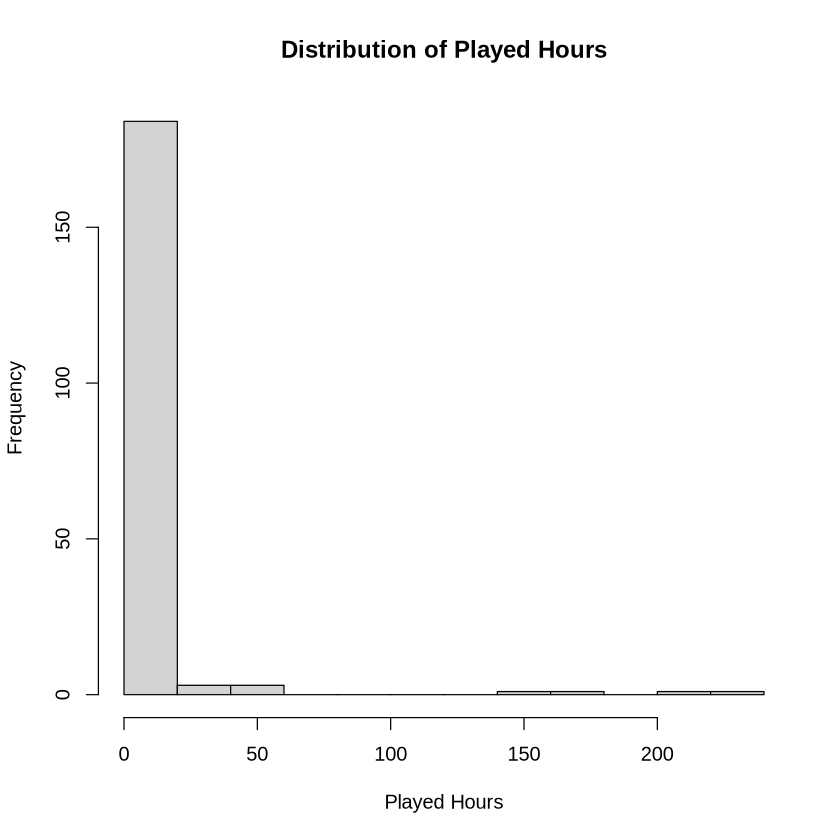

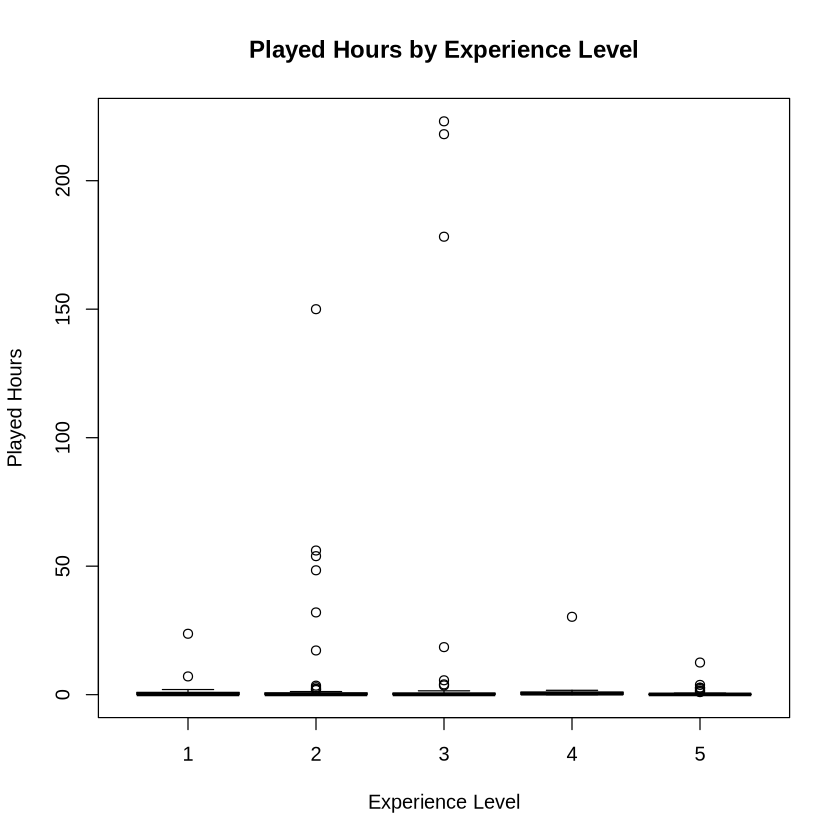

In [13]:
## Visualization

hist(players$played_hours, main = "Distribution of Played Hours", xlab = "Played Hours")

boxplot(played_hours ~ experience, data = players,
    main = "Played Hours by Experience Level",
    xlab = "Experience Level", ylab = "Played Hours")


Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


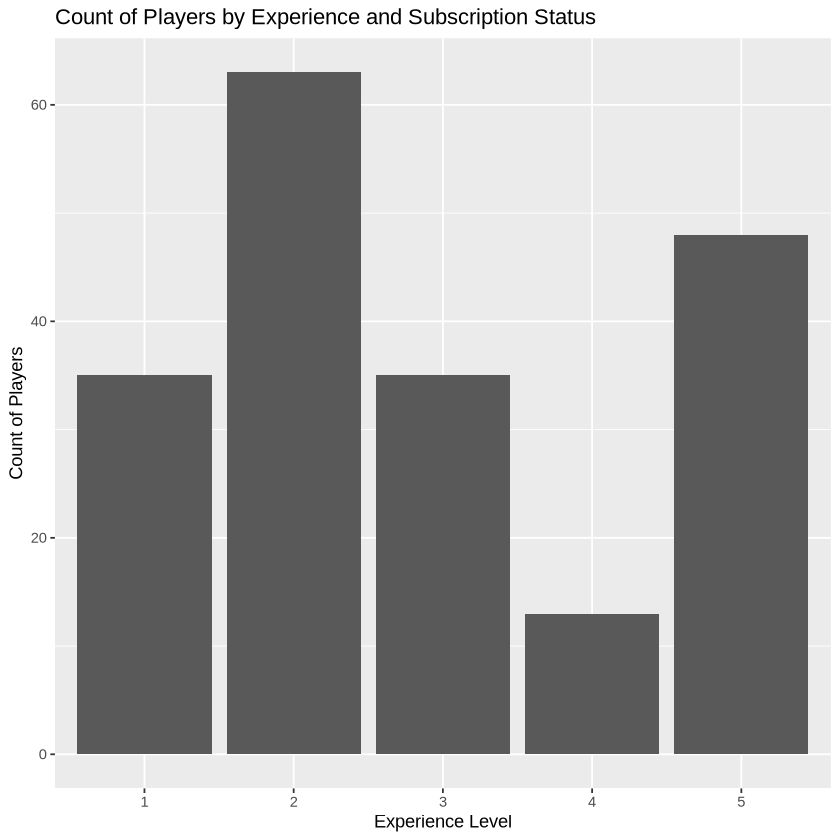

In [26]:
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar() +
  labs(title = "Count of Players by Experience and Subscription Status",
       x = "Experience Level",y = "Count of Players")

In [15]:
ggplot(players, aes(x = gender)) +
  geom_bar() +
  labs(title = "Gender Distribution", x = "Gender", y = "Count")

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'gender' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


Next, here is the code for the k-nn regression model to be able to predict the response variable played_hours using the the predictor variables experience, susbscribe and age. 

In [2]:
set.seed(1)
library(tidyverse) 
library(janitor)
library(readr) 
library(dplyr) 
library(stringr) 
library(GGally)
library(ISLR) 
library(repr) 
library(tidymodels)
url <- "https://raw.githubusercontent.com/FinBradshaw/Proposal-Planning/refs/heads/main/players.csv"
players <- read_csv(url)  
players <- players |> 
 tibble() |>
 clean_names() |>
filter(!is.na(age)) |> 
select(experience, subscribe, played_hours, age) |>
mutate(experience = recode(experience, Beginner = 1, Amateur = 2, Regular = 3, Pro = 4, Veteran = 5)) |> 
mutate(subscribe = as.character(subscribe)) |>
mutate(subscribe = recode(subscribe, "TRUE" = 2, "FALSE" = 1))

players_split <- initial_split(players, prop = 0.75, strata = played_hours)  
players_train <- training(players_split) 
players_test <- testing(players_split) 

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("regression") 

players_recipe <- recipe(played_hours ~ experience + subscribe + age, data = players_train) |> 
step_scale(all_predictors()) |> 
step_center(all_predictors())  

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours) 

players_workflow <- workflow() |> 
add_recipe(players_recipe) |> 
add_model(players_spec)  

gridvals <- tibble(neighbors = seq(from = 1, to = 106, by = 5)) 

players_results <- players_workflow |> 
tune_grid(resamples = players_vfold, grid = gridvals) |> 
collect_metrics() 

players_min <- players_results |> 
filter(.metric == "rmse") |> 
slice_min(mean, n = 1) 

players_min











── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip  

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,rmse,standard,28.55692,5,6.690528,Preprocessor1_Model05


As viewed, the minumum mean of the rmse occurs when k = 21. We want to minimize the rmse as much as possible because the smaller the mean of the rmse is, the smaller of the gap between the actual and predicted value of played hours is. So, for our model we will use k = 21 for the best outcome in predictions of played hours. 

In [3]:
neighbor_num <- players_min|> 
               pull(neighbors)
players_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors = neighbor_num) |> 
set_engine("kknn") |> 
set_mode("regression") 

players_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_spec_k) |>
         fit(data = players_train)

players_summary <- players_fit |>
          predict(players_test) |>
          bind_cols(players_test) |>
          metrics(truth = played_hours, estimate = .pred)
players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,14.40708104
rsq,standard,0.00233459
mae,standard,9.08911565


With our model, it was able to predict the actual value of hours played with an error of +/- 14.4 hours in our testing set. This is quite a big error considering most of the hours played are below 10 hours. This is caused by the few outliers who have a lot more hours played than the average person. As most players have played less than 10 hours, the few people who have played significantly more hours than such as 50+ create this big error. 

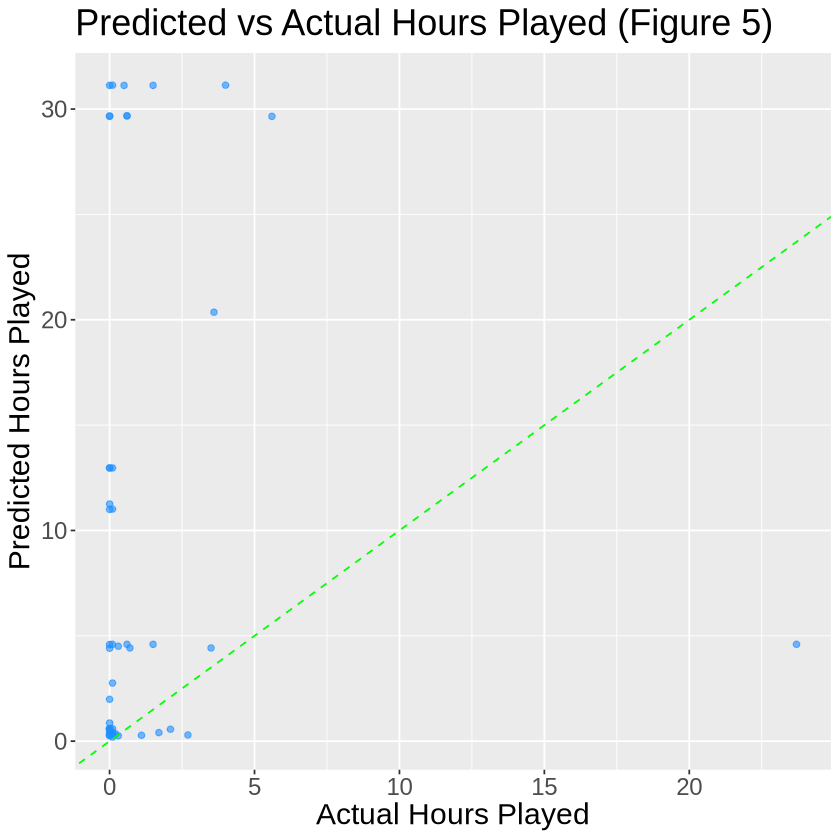

In [29]:
players_predicted <- players_fit |>
          predict(players_test) |>
          bind_cols(players_test)  

predicted_vs_actual <- players_predicted |>
ggplot(aes(x = played_hours, y = .pred,)) + 
        geom_point(alpha = 0.6, color = "dodgerblue") +
  geom_abline(slope = 1, intercept = 0, color = "green", linetype = "dashed") +
  labs(title = "Predicted vs Actual Hours Played (Figure 5)", x = "Actual Hours Played", y = "Predicted Hours Played")+ 
theme(text = element_text(size = 18))
predicted_vs_actual

The closer the dots are to the center line means the closer the prediction was to the actual value. Here we can see the model has had a hard time accurately predicting hours played as there are not many points that lie near the center line.

In [30]:

new_observation1 <- tibble(experience = 3, subscribe = 2, age = 22) 
new_observation2 <- tibble(experience = 5, subscribe = 1, age = 45) 

predicted_hours <- predict(players_fit, new_observation1) 
predicted_hours1 <- predict(players_fit, new_observation2) 

predicted_hours 
predicted_hours1 


.pred
<dbl>
23.28095


.pred
<dbl>
1.985714


Viewed above, the model does work to a certain extent in being able to predict hours played based off of the attributes outlined above. Someone in the early twenties who is a regular gamer and is subscribed to the newsletter will be predicted to play quite a few more hours compared to an old unsuscribed veteran gamer. Although analyzing the data, it is hard to make a good prediction due to the outliers in the dataset. However, from the exploratory data analysis we can see the that the younger, regular, subscribed gamer will play more than a old, veteran, unsubscribed gamer. So, the model is good at predicting who will play more hours, but not exactly how many hours. 

## Discussion

### Findings

**Age:** The distribution of of played time is relatively even through all ages with some increase within the **8 - 25** years of age range, including outliers;

**Experience:** The total amount of hours played is highest for **regular players**, followed by **amateur paleyrs**. However, when considering outliers, the average amount of hours played by amateur players surpasses the average playtime of regulars.

**Subscribe:** For all levels of experience, players who subscribe to gaming newsleters have higher avergare playtime than non-subscribers. this is especially true for **amateurs**, **pro** and **regular players**.

**Gender**: The vast majority of players is male and when removing outliers, the average time played is higehr is also higher for males.

Our findings confirmed our suspicions regarding the age of the players. However, to our surprise, professional players do not seem to have a high amount of played hours. 

### Expectations

Before beginning our research, we expected individuals of younger age to be the demographics spending more time playing videogames. We also expected to find if professional players would spend the most time playing. Our findings confirmed our suspicions regarding the age of the players. However, to our surprise, professional players do not seem to be the first or even the second group of players with who spend the most time playing on average.

### Implications

Based on our model, player attributes is useful to determined the amount of hours played. To make the collection of data efficient and maximize the number of hours played it is important to focus recruitment efforts into a specific segment of players. According to our research, it is best to focus on recruiting individuals arround their twenties with regular and amateur experience. Individuals with those experiences who subscribe to newsletters presented expressively higer played hours, and for that reason using newsletters as a mean of communication and promotion for future researchs would be a good idea.

### Conclusion

We would like to see more research to understand playing behavior of individuals with professional experience. Based on our research, this category has the fewest outliers and a relatively even playtime distrubution. 

Finally, it seems best to aim to recruit **Male** individuals, since they comprise the vast majority of gamers and have a higher average play time, when removing the outliers. However, it is not clear why the percent of males is this high. It is possible that the lower attendence of females and other genders be due to external factors not considered in our research, such as biased recruitment. For that reason we did not consider gender in our model, as we believe more research is requried to understand the underlying cause.